In [1]:
import os
from google.colab import drive
drive.mount('/content/drive')
!ls "/content/drive/My Drive"

Mounted at /content/drive
'Colab Notebooks'  'emotion detection dateset'	'Getting started.pdf'


In [2]:
import os
import matplotlib.pyplot as plt
import numpy as np
import sklearn.neighbors as sn
from sklearn.metrics import accuracy_score
import scipy.linalg as sl
import imageio
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn import decomposition

Load data set

<ipython-input-8-ab88acf9b068>:26: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  face = imageio.imread(os.path.join(root, file)) # Load image from a path


number of train data images is 213 and number of features for each image is 65536


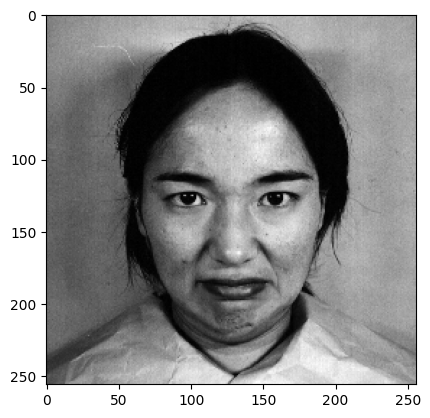

In [8]:
def main():
    train_data , train_label = loadImages("/content/drive/MyDrive/emotion detection dateset/train")
    test_data , test_label = loadImages("/content/drive/MyDrive/emotion detection dateset/test")

    print("number of train data images is" , train_data.shape[0] , "and number of features for each image is", train_data.shape[1])

    ### To show each images, you should reshape it to 256,256 and then use 'plt.imshow'
    plt.imshow(train_data[0].reshape(256,256) , cmap='gray')
    plt.show()

    ### Write your code here
    return train_data, train_label, test_data, test_label

    ###



def loadImages(dirName):
    # This function loads images from any directory
    # :param str dirName: is address of the directory (string)

    data = []
    label = []
    for root, dirs, files in os.walk(dirName):
        for file in files:
            face = imageio.imread(os.path.join(root, file)) # Load image from a path
            face = face.reshape(256 * 256, ).tolist()          # Flatten image . Note: size of any image is 256,256
            data.append(face)
            label.append(file.split('.')[1])                   # Label of an image is in its fileName
    return np.asarray(data) , label



if __name__ == '__main__':
    train_data, train_label, test_data, test_label = main()

eigen values and eigen vectors

[1.05871950e-07 3.27182711e+06 3.95080660e+06 4.01844528e+06
 4.14805366e+06 4.38674697e+06 4.48856013e+06 4.66056926e+06
 4.78364297e+06 4.88882254e+06 4.99951605e+06 5.11153131e+06
 5.25061371e+06 5.46104807e+06 5.53550198e+06 5.67493993e+06
 5.79513261e+06 5.91493284e+06 5.99276151e+06 6.04546681e+06
 6.16659448e+06 6.25586793e+06 6.34811685e+06 6.52553611e+06
 6.57869299e+06 6.92413563e+06 6.97402646e+06 7.06134259e+06
 7.12695864e+06 7.19986437e+06 7.33613319e+06 7.49262912e+06
 7.65240791e+06 7.80152232e+06 7.94880466e+06 8.01492026e+06
 8.16272944e+06 8.38036622e+06 8.52876407e+06 8.66288956e+06
 8.72478659e+06 8.75741577e+06 8.93255118e+06 9.02602739e+06
 9.11641720e+06 9.24355345e+06 9.42881021e+06 9.66137278e+06
 9.77758536e+06 9.85441334e+06 9.89860315e+06 1.00997945e+07
 1.03375094e+07 1.05218056e+07 1.07496175e+07 1.08668658e+07
 1.11383763e+07 1.12992428e+07 1.13530821e+07 1.15360027e+07
 1.16092047e+07 1.17908423e+07 1.21227429e+07 1.21908617e+07
 1.23822653e+07 1.256706

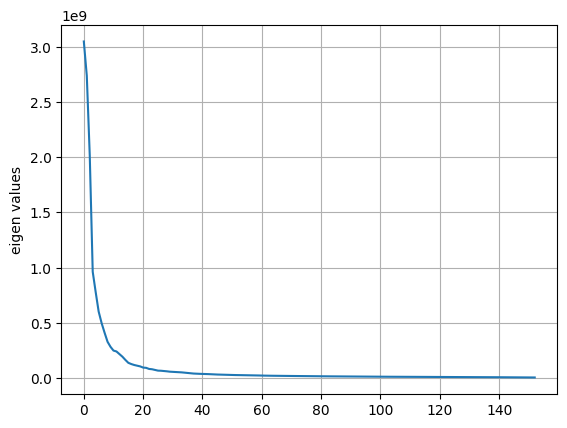

In [14]:
train_data_normalized= train_data - np.mean(train_data, axis=0)
test_data_normalized= test_data - np.mean(train_data, axis=0)
tmp_eig_vectors, eig_values, tmp_eig_vectors_trs= np.linalg.svd(np.matmul(train_data_normalized,train_data_normalized.T))
print(np.sort(eig_values))
tmp_eig_vectors= tmp_eig_vectors[:, :-1]
eig_values= eig_values[:-1]
eig_vectors= np.matmul(np.transpose(train_data), tmp_eig_vectors )
plt.plot(eig_values)
plt.ylabel("eigen values")
plt.grid()
plt.show()

plot eig vectors

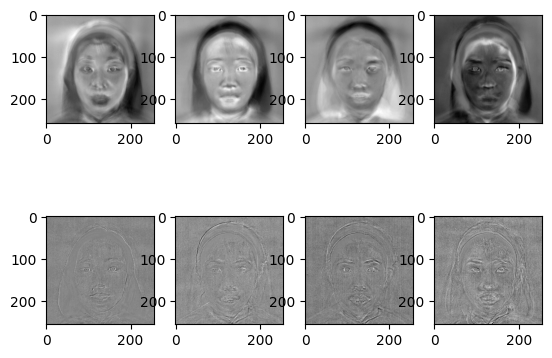

In [15]:
plt.subplot(2, 4, 1)
plt.imshow(eig_vectors[:,0].reshape(256,256) , cmap='gray')
plt.subplot(2, 4, 2)
plt.imshow(eig_vectors[:,1].reshape(256,256) , cmap='gray')
plt.subplot(2, 4, 3)
plt.imshow(eig_vectors[:,2].reshape(256,256) , cmap='gray')
plt.subplot(2, 4, 4)
plt.imshow(eig_vectors[:,3].reshape(256,256) , cmap='gray')
plt.subplot(2, 4, 5)
plt.imshow(eig_vectors[:,152].reshape(256,256) , cmap='gray')
plt.subplot(2, 4, 6)
plt.imshow(eig_vectors[:,151].reshape(256,256) , cmap='gray')
plt.subplot(2, 4, 7)
plt.imshow(eig_vectors[:,150].reshape(256,256) , cmap='gray')
plt.subplot(2, 4, 8)
plt.imshow(eig_vectors[:,149].reshape(256,256) , cmap='gray')